In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn model for prediction of a boolean based on age and gender
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


data = pd.read_csv('data/train.csv')

data = data.dropna(subset=['Age', 'Sex', 'Survived'])
print(len(data))

# train/test split
train_data, test_data = train_test_split(data, test_size=0.3, stratify=data['Survived'], random_state=200)
# make dummy data from sex column
print(len(train_data), len(test_data))
train_data.head()

714
499 215


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S


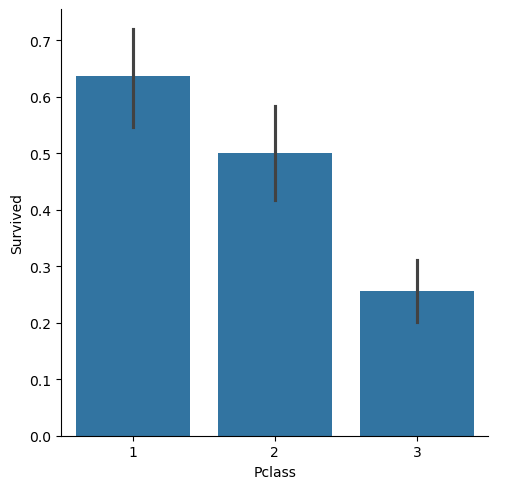

In [528]:
sns.catplot(x=train_data['Pclass'], y=train_data['Survived'], kind='bar', data=train_data)

It is clear to see that passenger class has an correlation with the survival rate. 1st class passengers tend to survive more often than not, 3rd class passengers tend to survive less than average and 2nd class passengars survive have a survival rate of about 50%. Because of this clear correlation i'm using Passenger Class as a feature for my ML model.

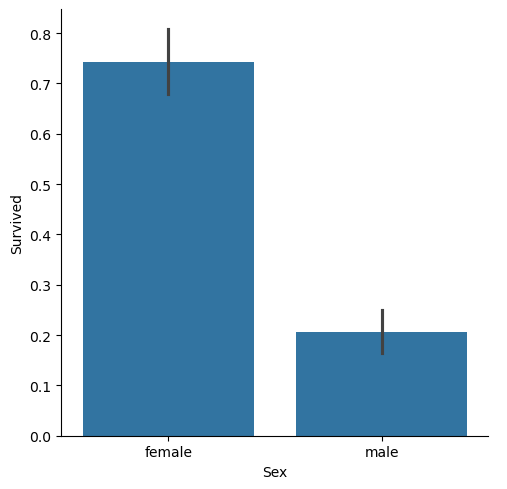

In [529]:
sns.catplot(x=train_data['Sex'], y=train_data['Survived'], kind='bar', data=train_data)

As for Sex it is also clear to see that there is a huge difference in survival rate between men and women. with around 75% of women surviving compared to men's 20% survival rate. I will therefore be using Sex as a feature in my ML model

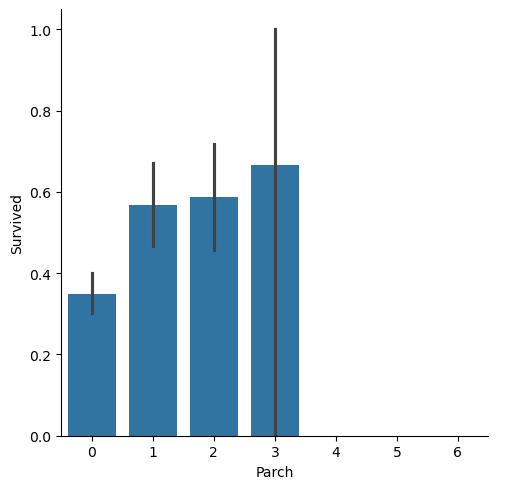

In [530]:
sns.catplot(x=train_data['Parch'], y=train_data['Survived'], kind='bar', data=train_data)

The correlation between the amount of parents or children a passenger had aboard and their survival is less clear, but we can still conclude that someone with no parents or children aboard had a below average sruvival rate. People with at least one parent or child aboard have a survival rate of around 50%, from which we can not conclude anything. However, because having a Parch value of 0 still correlates to a lower survival rate i will include it in my features.

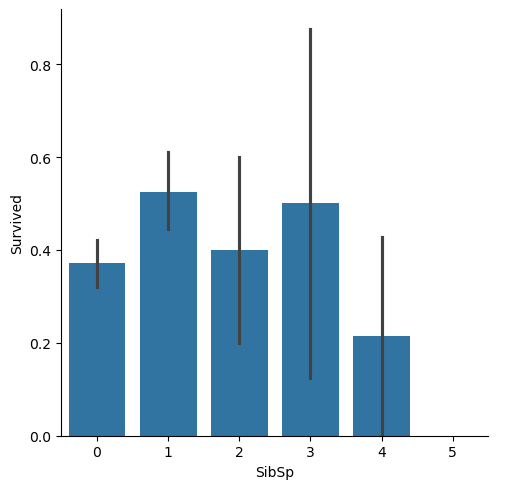

In [531]:
sns.catplot(x=train_data['SibSp'], y=train_data['Survived'], kind='bar', data=train_data)

The correlation between SibSp(the number of siblings and spouses aboard) and the survival rate is very vague because of the high confidence intervals. The only value that has a relatively low confidence interval is 0. The rest of the values are rendered useless, because of the high confidence interval. For this reason i will not use SibSp as a feature of my ML model.

In [532]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Pclass'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Pclass'])
# get_dummies for Parch and SibSp. Leave only the column for value 0
train_data['Parch'] = (train_data['Parch'] > 0).astype(bool)
test_data['Parch'] = (test_data['Parch'] > 0).astype(bool)
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
865,866,1,"Bystrom, Mrs. (Karolina)",42.0,0,False,236852,13.0000,NaN,S,True,False,False,True,False
73,74,0,"Chronopoulos, Mr. Apostolos",26.0,1,False,2680,14.4542,NaN,C,False,True,False,False,True
210,211,0,"Ali, Mr. Ahmed",24.0,0,False,SOTON/O.Q. 3101311,7.0500,NaN,S,False,True,False,False,True
591,592,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",52.0,1,False,36947,78.2667,D20,C,True,False,True,False,False
287,288,0,"Naidenoff, Mr. Penko",22.0,0,False,349206,7.8958,NaN,S,False,True,False,False,True


In [533]:
features = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp'], axis=1)
features_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp'], axis=1)
train_rocs = []
test_rocs = []
for i in range(1, 10):
    regr = tree.DecisionTreeClassifier(max_depth=i)
    regr.fit(features.drop(['Survived'], axis=1), features['Survived'])
    train_predictions = regr.predict(features.drop('Survived', axis=1))
    train_rocs.append([i, metrics.roc_auc_score(features['Survived'], train_predictions)])
    test_predictions = regr.predict(features_test.drop('Survived', axis=1))
    test_rocs.append([i, metrics.roc_auc_score(features_test['Survived'], test_predictions)])
print(f'Train ROC per tree depth: {train_rocs}')
print(f'Test ROC per tree depth: {test_rocs}')
best_depth = max(test_rocs, key=lambda x: x[1])[0]
print(f'Best Train ROC is {max(train_rocs, key=lambda x: x[1])[1]} with depth {max(train_rocs, key=lambda x: x[1])[0]}')
print(f'Best Test ROC is {max(test_rocs, key=lambda x: x[1])[1]} with depth {best_depth}')

Train ROC per tree depth: [[1, 0.7612834509386234], [2, 0.766500798828385], [3, 0.8012581547064306], [4, 0.7976051790706964], [5, 0.8140726933830382], [6, 0.8396185594461456], [7, 0.8584076687524963], [8, 0.8862751298096126], [9, 0.9004210491279457]]
Test ROC per tree depth: [[1, 0.7708333333333333], [2, 0.7600125718390804], [3, 0.7922054597701149], [4, 0.7636943247126438], [5, 0.7715068247126438], [6, 0.79058908045977], [7, 0.7728987068965517], [8, 0.7885237068965517], [9, 0.7882992097701149]]
Best Train ROC is 0.9004210491279457 with depth 9
Best Test ROC is 0.7922054597701149 with depth 3


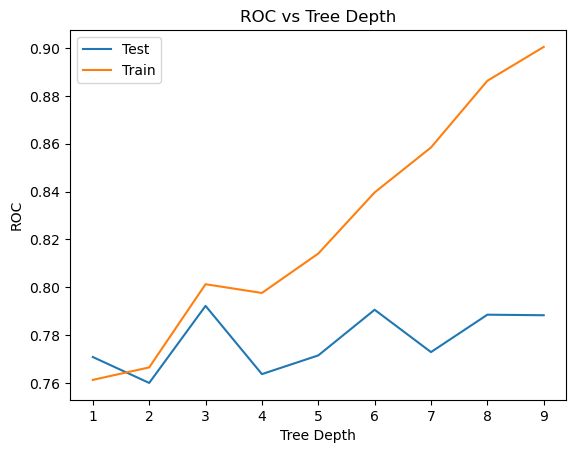

In [534]:
test_rocs_plot = pd.DataFrame(test_rocs, columns=['Depth', 'ROC'])
train_rocs_plot = pd.DataFrame(train_rocs, columns=['Depth', 'ROC'])
plt.plot(test_rocs_plot['Depth'], test_rocs_plot['ROC'])
plt.plot(train_rocs_plot['Depth'], train_rocs_plot['ROC'])
plt.legend(['Test', 'Train'])
plt.xlabel('Tree Depth')
plt.ylabel('ROC')
plt.title('ROC vs Tree Depth')
plt.show()

In [535]:
import graphviz

def plot_tree(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=['Survived', 'Did not survive'],  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

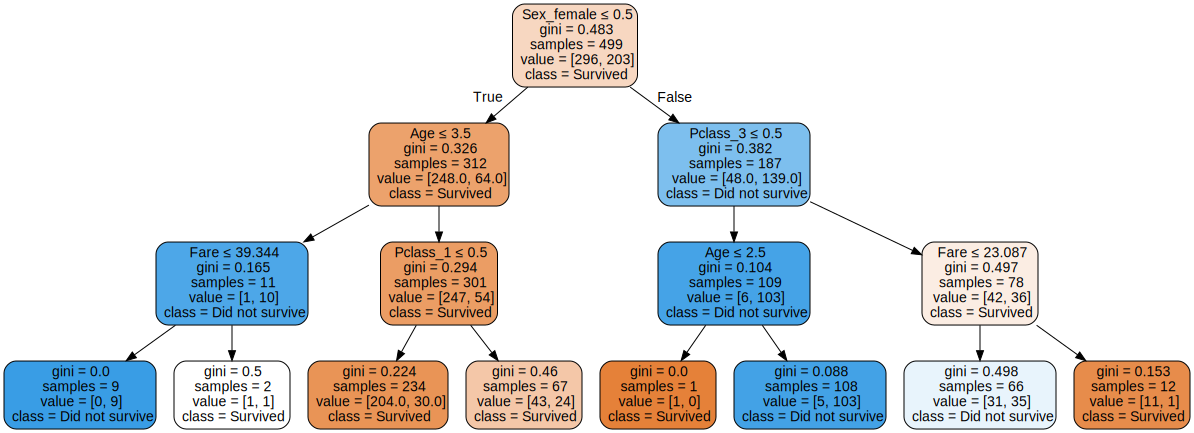

In [536]:
regr = tree.DecisionTreeClassifier(max_depth=best_depth)
featuresModel1 = features.drop(['Survived'], axis=1).columns
regr.fit(features.drop(['Survived'], axis=1), features['Survived'])
plot_tree(regr, features.drop(['Survived'], axis=1).columns)

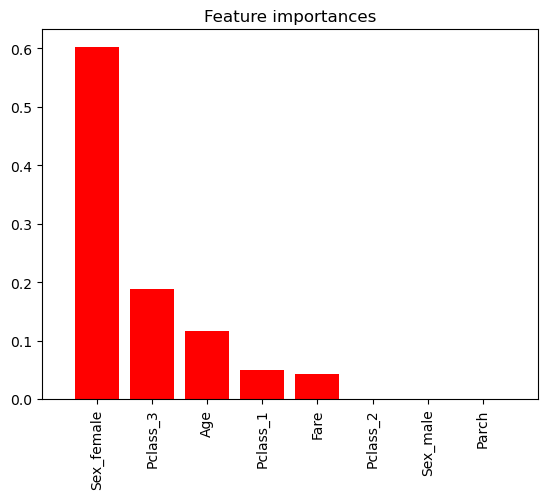

In [537]:
# plot feature importance
importances = regr.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(features.drop(['Survived'], axis=1).shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(features.drop(['Survived'], axis=1).shape[1]), features.drop(['Survived'], axis=1).columns[indices], rotation=90)
plt.xlim([-1, features.drop(['Survived'], axis=1).shape[1]])
plt.show()